In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno


In [8]:
from google.colab import files
uploaded = files.upload()

Saving imdb_top_1000.csv to imdb_top_1000 (1).csv


In [10]:
df = pd.read_csv("imdb_top_1000.csv")
df.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [11]:
df.sample(5)

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
901,https://m.media-amazon.com/images/M/MV5BMjMxNj...,End of Watch,2012,A,109 min,"Action, Crime, Drama",7.6,"Shot documentary-style, this film follows the ...",68.0,David Ayer,Jake Gyllenhaal,Michael Peña,Anna Kendrick,America Ferrera,228132,"41,003,371"
722,https://m.media-amazon.com/images/M/MV5BNjk1Nj...,Deadpool 2,2018,R,119 min,"Action, Adventure, Comedy",7.7,Foul-mouthed mutant mercenary Wade Wilson (a.k...,66.0,David Leitch,Ryan Reynolds,Josh Brolin,Morena Baccarin,Julian Dennison,478586,"324,591,735"
946,https://m.media-amazon.com/images/M/MV5BNDhjMz...,Y tu mamá también,2001,A,106 min,Drama,7.6,"In Mexico, two teenage boys and an attractive ...",88.0,Alfonso Cuarón,Maribel Verdú,Gael García Bernal,Daniel Giménez Cacho,Ana López Mercado,115827,"13,622,333"
427,https://m.media-amazon.com/images/M/MV5BMTQ0OD...,The Graduate,1967,A,106 min,"Comedy, Drama, Romance",8.0,A disillusioned college graduate finds himself...,83.0,Mike Nichols,Dustin Hoffman,Anne Bancroft,Katharine Ross,William Daniels,253676,"104,945,305"
864,https://m.media-amazon.com/images/M/MV5BZjM3ZT...,Peeping Tom,1960,NaN,101 min,"Drama, Horror, Thriller",7.7,"A young man murders women, using a movie camer...",NaN,Michael Powell,Karlheinz Böhm,Anna Massey,Moira Shearer,Maxine Audley,31354,"83,957"


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


In [13]:
df.describe()

,IMDB_Rating,Meta_score,No_of_Votes
count,1000.000000,843.000000,1.000000e+03
mean,7.949300,77.971530,2.736929e+05
std,0.275491,12.376099,3.273727e+05
min,7.600000,28.000000,2.508800e+04
25%,7.700000,70.000000,5.552625e+04
50%,7.900000,79.000000,1.385485e+05
75%,8.100000,87.000000,3.741612e+05
max,9.300000,100.000000,2.343110e+06


In [14]:
df.columns

Index(['Poster_Link', 'Series_Title', 'Released_Year', 'Certificate',
       'Runtime', 'Genre', 'IMDB_Rating', 'Overview', 'Meta_score', 'Director',
       'Star1', 'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross'],
      dtype='object')

In [15]:
df[df.duplicated()]

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross


In [16]:
df.drop(['Poster_Link', 'Series_Title','Poster_Link', 'Series_Title','Overview'],axis=1,inplace=True)

In [17]:
df.isnull().sum()


,0
Released_Year,0
Certificate,101
Runtime,0
Genre,0
IMDB_Rating,0
Meta_score,157
Director,0
Star1,0
Star2,0
Star3,0


In [19]:
df['Certificate'].fillna('U',inplace=True)

df['Meta_score'].fillna(df['Meta_score'].mean(),inplace=True)

/tmp/ipython-input-3126915629.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Meta_score'].fillna(df['Meta_score'].mean(),inplace=True)


In [20]:
#convert type to int to deal with it
df["Gross"] = df["Gross"].str.replace(",","")
df["Gross"] = df["Gross"].replace(np.nan, 0)
df["Gross"] = df["Gross"].astype(int)

# fill null data with the avg gross
df["Gross"] = df["Gross"].replace(0,df['Gross'].mean())

In [21]:
df.isnull().sum()

,0
Released_Year,0
Certificate,0
Runtime,0
Genre,0
IMDB_Rating,0
Meta_score,0
Director,0
Star1,0
Star2,0
Star3,0


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Released_Year  1000 non-null   object 
 1   Certificate    1000 non-null   object 
 2   Runtime        1000 non-null   object 
 3   Genre          1000 non-null   object 
 4   IMDB_Rating    1000 non-null   float64
 5   Meta_score     1000 non-null   float64
 6   Director       1000 non-null   object 
 7   Star1          1000 non-null   object 
 8   Star2          1000 non-null   object 
 9   Star3          1000 non-null   object 
 10  Star4          1000 non-null   object 
 11  No_of_Votes    1000 non-null   int64  
 12  Gross          1000 non-null   float64
dtypes: float64(3), int64(1), object(9)
memory usage: 101.7+ KB


In [23]:
df["Runtime"] = df["Runtime"].str.extract('([^\s]+)')
df["Runtime"] = df["Runtime"][~(df["Runtime"] == "min")]
df["Runtime"] = df["Runtime"].astype(int)

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-3363335134.py:1: SyntaxWarning: invalid escape sequence '\s'
  df["Runtime"] = df["Runtime"].str.extract('([^\s]+)')


In [24]:
df['Released_Year'].value_counts()

,count
Released_Year,
2014,32
2004,31
2009,29
2013,28
2016,28
...,...
1920,1
1930,1
1922,1


In [28]:
df['Released_Year']=df['Released_Year'].astype(int)

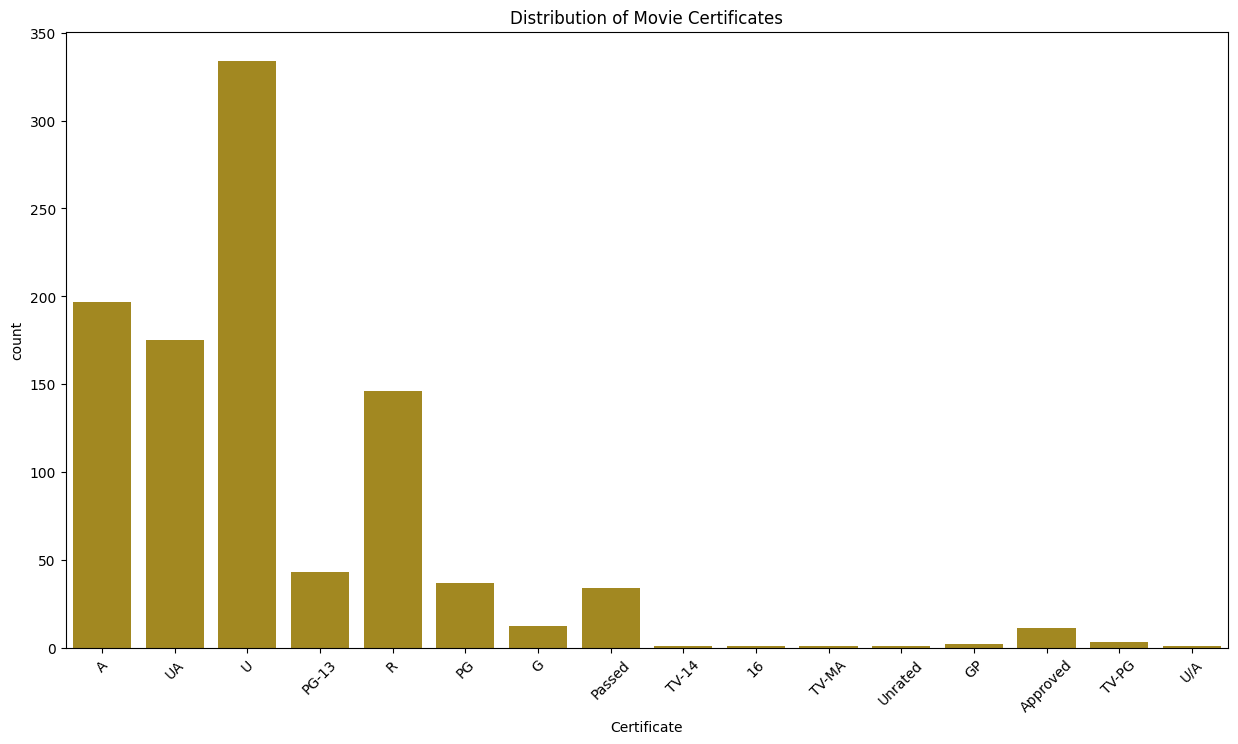

In [30]:
plt.figure(figsize=(15,8))
sns.countplot(x='Certificate', data=df, color='#B7950B')
plt.xticks(rotation=45)
plt.title('Distribution of Movie Certificates')
plt.show()

In [32]:
top_rates = (
    df.groupby('Genre', as_index=False)['IMDB_Rating']
      .mean()
      .sort_values(by='IMDB_Rating', ascending=False)
      .round(2)
      .head(10)
)

top_rates

,Genre,IMDB_Rating
80,"Animation, Drama, War",8.50
34,"Action, Sci-Fi",8.40
166,"Drama, Musical",8.40
171,"Drama, Mystery, War",8.35
201,Western,8.35
144,"Drama, Fantasy, Horror",8.30
116,"Comedy, Musical, Romance",8.30
127,"Crime, Drama, Music",8.30
131,"Crime, Drama, Sci-Fi",8.30
59,"Adventure, Mystery, Thriller",8.30


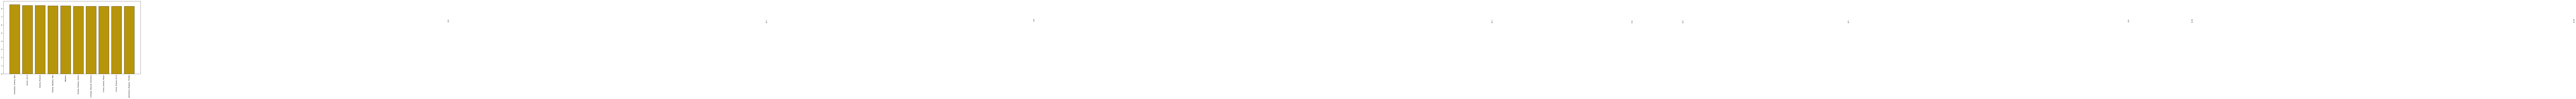

In [33]:
plt.figure(figsize=(15,8))
plt.bar(top_rates['Genre'],top_rates['IMDB_Rating'],color='#B7950B',edgecolor='black' )
plt.xticks(rotation='vertical')
for k,v in top_rates['IMDB_Rating'].items():
    plt.text(k,v-2,str(v),rotation=90)

In [36]:
df.columns

Index(['Released_Year', 'Certificate', 'Runtime', 'Genre', 'IMDB_Rating',
       'Meta_score', 'Director', 'Star1', 'Star2', 'Star3', 'Star4',
       'No_of_Votes', 'Gross'],
      dtype='object')

In [37]:
df['Meta_score'] = pd.to_numeric(df['Meta_score'], errors='coerce')

In [38]:
top_rates = (
    df.groupby('Genre', as_index=False)['Meta_score']
      .mean()
      .sort_values(by='Meta_score', ascending=False)
      .round(2)
      .head(10)
)
top_rates


,Genre,Meta_score
197,"Mystery, Romance, Thriller",100.0
116,"Comedy, Musical, Romance",99.0
115,"Comedy, Music, Romance",98.0
148,"Drama, Fantasy, War",98.0
59,"Adventure, Mystery, Thriller",98.0
190,"Film-Noir, Mystery, Thriller",97.0
10,"Action, Adventure, Romance",97.0
189,"Film-Noir, Mystery",96.0
191,"Film-Noir, Thriller",94.0
80,"Animation, Drama, War",94.0


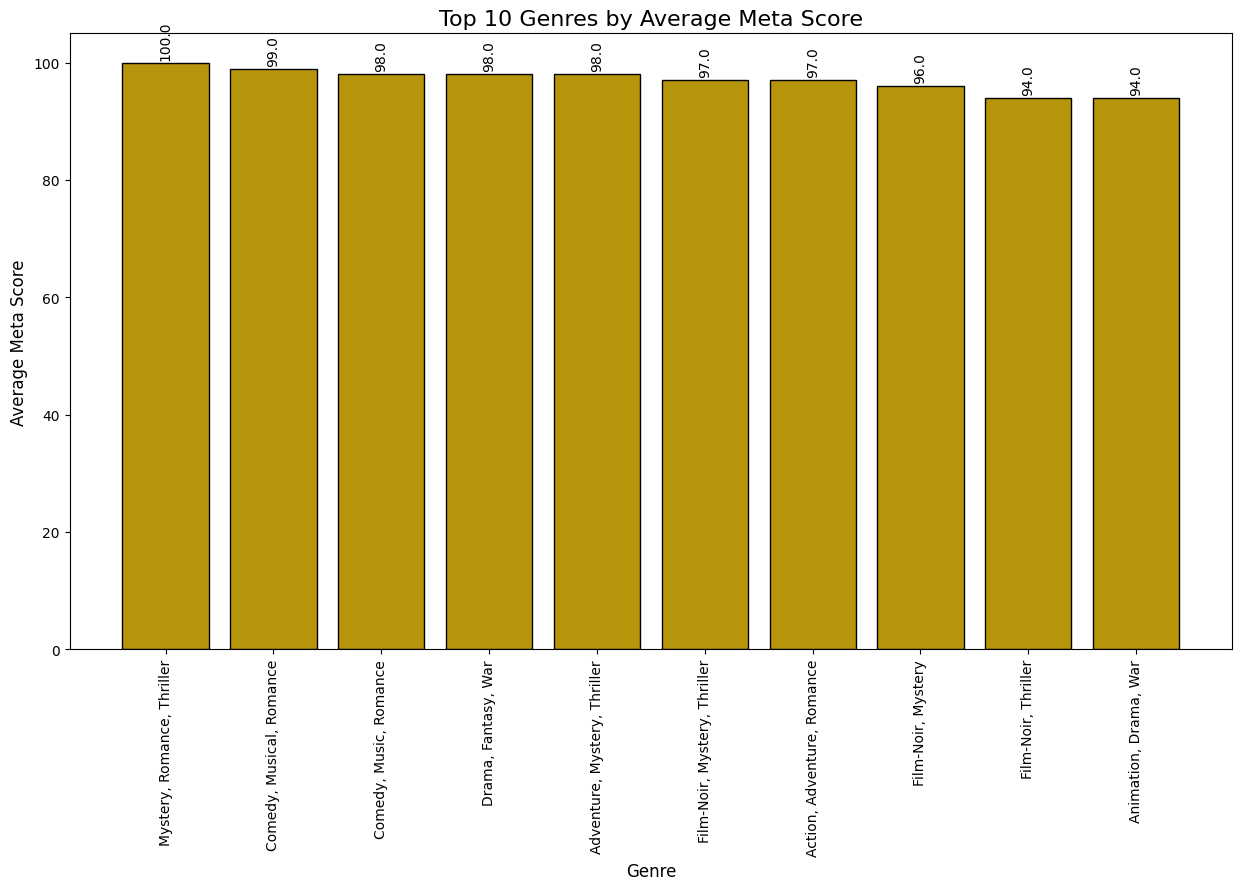

In [39]:
plt.figure(figsize=(15,8))
plt.bar(top_rates['Genre'], top_rates['Meta_score'], color='#B7950B', edgecolor='black')
plt.xticks(rotation='vertical')
plt.title('Top 10 Genres by Average Meta Score', fontsize=16)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Average Meta Score', fontsize=12)

for i, v in enumerate(top_rates['Meta_score']):
    plt.text(i, v + 0.5, str(v), ha='center', va='bottom', fontsize=10, rotation=90)

plt.show()

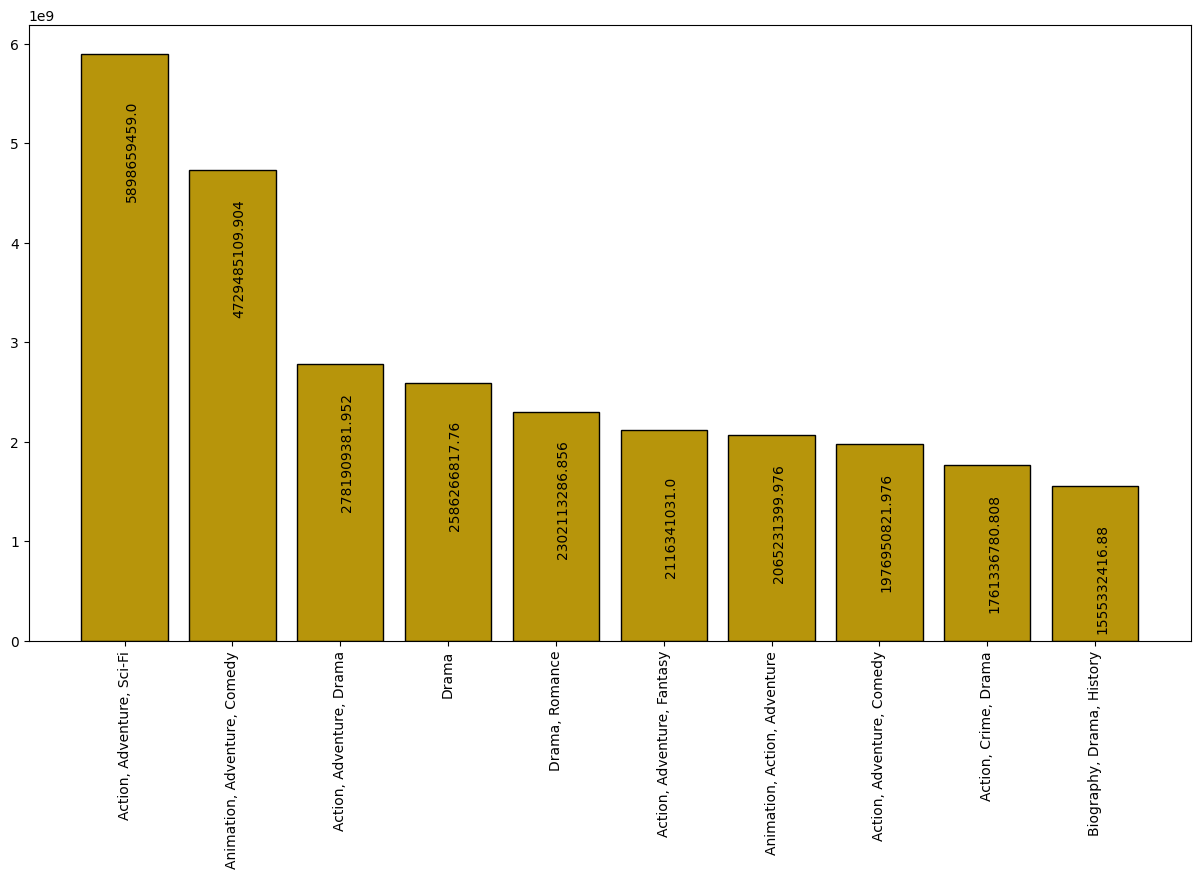

In [40]:
top_earn = df.groupby('Genre').sum().sort_values('Gross',ascending=False).head(10)
top_earn=top_earn[['Gross']]
top_earn.reset_index(inplace=True)

plt.figure(figsize=(15,8))
plt.bar(top_earn['Genre'],top_earn['Gross'],color='#B7950B',edgecolor='black')
plt.xticks(rotation='vertical')
for k,v in top_earn['Gross'].items():
    plt.text(k,v-1450000000,str(v),rotation=90)

/tmp/ipython-input-3811310086.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(x='Certificate',y='Gross',color='#B7950B',data=df,ci=False)


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, 'A'),
  Text(1, 0, 'UA'),
  Text(2, 0, 'U'),
  Text(3, 0, 'PG-13'),
  Text(4, 0, 'R'),
  Text(5, 0, 'PG'),
  Text(6, 0, 'G'),
  Text(7, 0, 'Passed'),
  Text(8, 0, 'TV-14'),
  Text(9, 0, '16'),
  Text(10, 0, 'TV-MA'),
  Text(11, 0, 'Unrated'),
  Text(12, 0, 'GP'),
  Text(13, 0, 'Approved'),
  Text(14, 0, 'TV-PG'),
  Text(15, 0, 'U/A')])

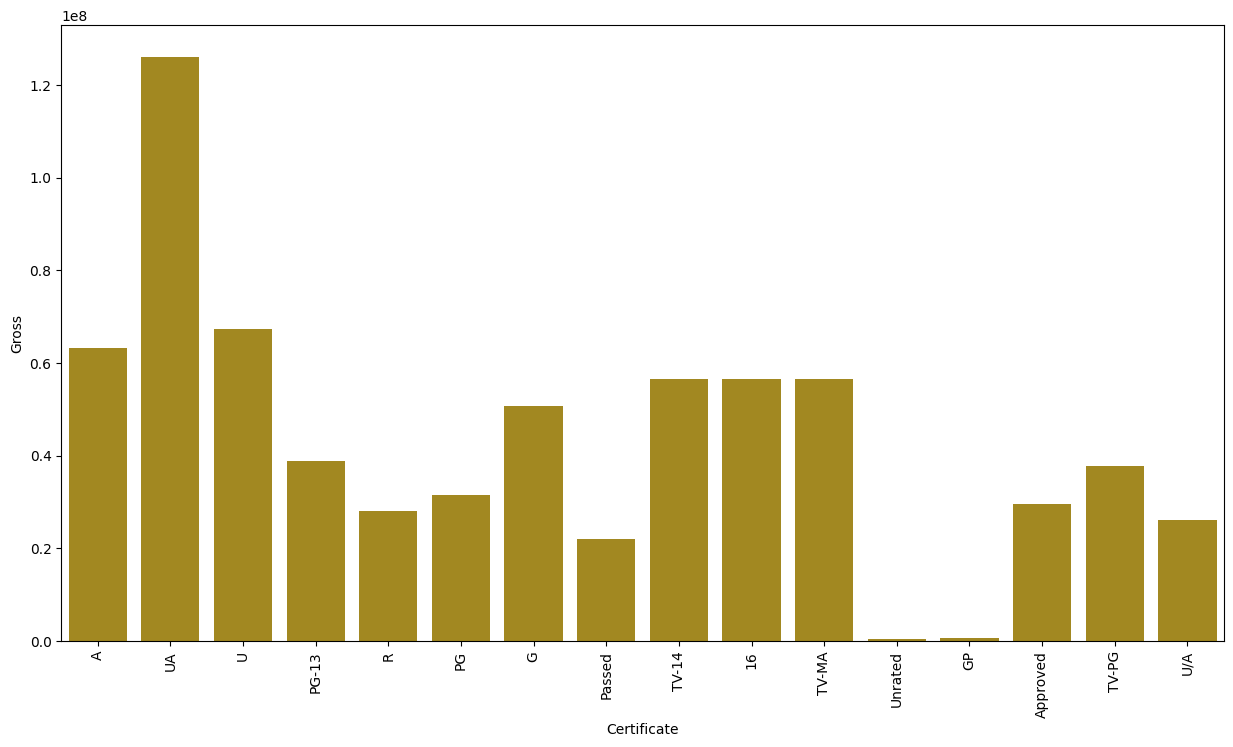

In [41]:
plt.figure(figsize=(15,8))
sns.barplot(x='Certificate',y='Gross',color='#B7950B',data=df,ci=False)
plt.xticks(rotation='vertical')


In [43]:
top_director = df.groupby('Director')[['IMDB_Rating', 'Gross']].mean().sort_values('Gross', ascending=False).head(10)


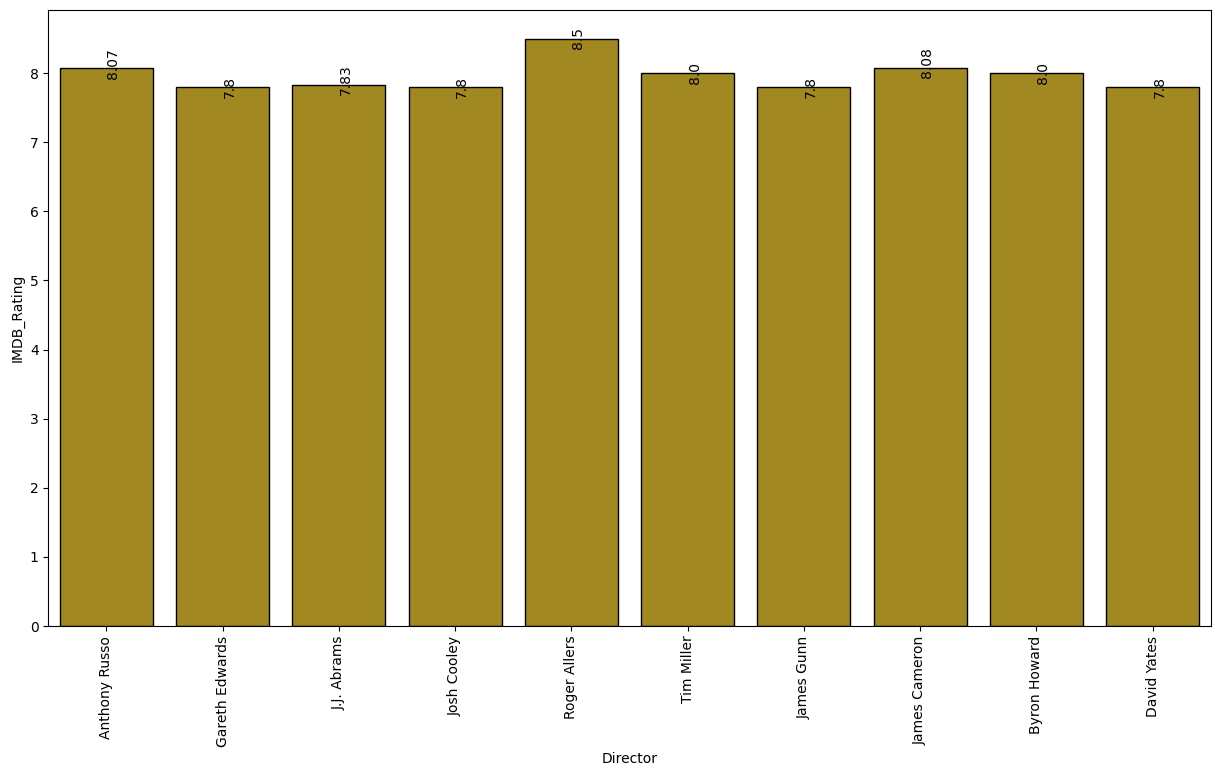

In [44]:
top_director = top_director[['IMDB_Rating']]
top_director.reset_index(inplace=True)

plt.figure(figsize=(15,8))
sns.barplot(x='Director', y='IMDB_Rating', data=top_director, color='#B7950B', edgecolor='black')
plt.xticks(rotation='vertical')

for k, v in enumerate(top_director['IMDB_Rating']):
    plt.text(k, v - 0.1, str(round(v,2)), rotation=90)
plt.show()


<Axes: xlabel='IMDB_Rating', ylabel='Gross'>

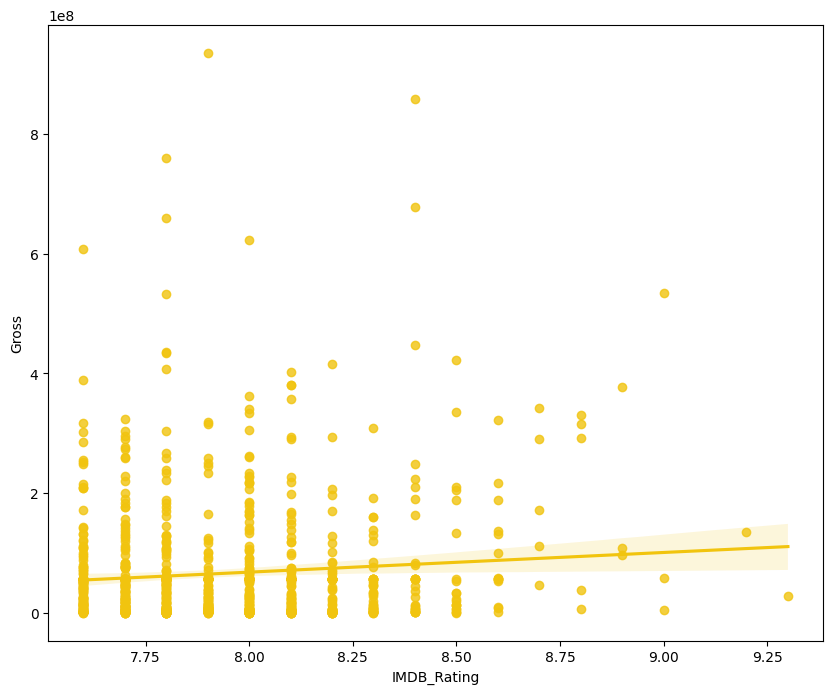

In [45]:
plt.figure(figsize=(10,8))
sns.regplot(x='IMDB_Rating',y='Gross',data=df,color='#F1C40F')

<Axes: xlabel='Meta_score', ylabel='Gross'>

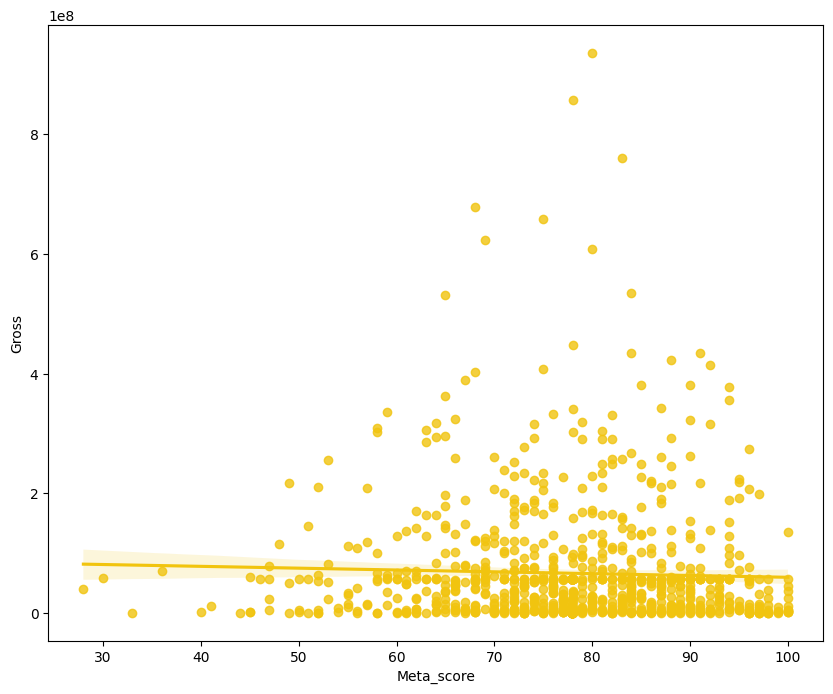

In [46]:
plt.figure(figsize=(10,8))
sns.regplot(x='Meta_score',y='Gross',data=df,color='#F1C40F')


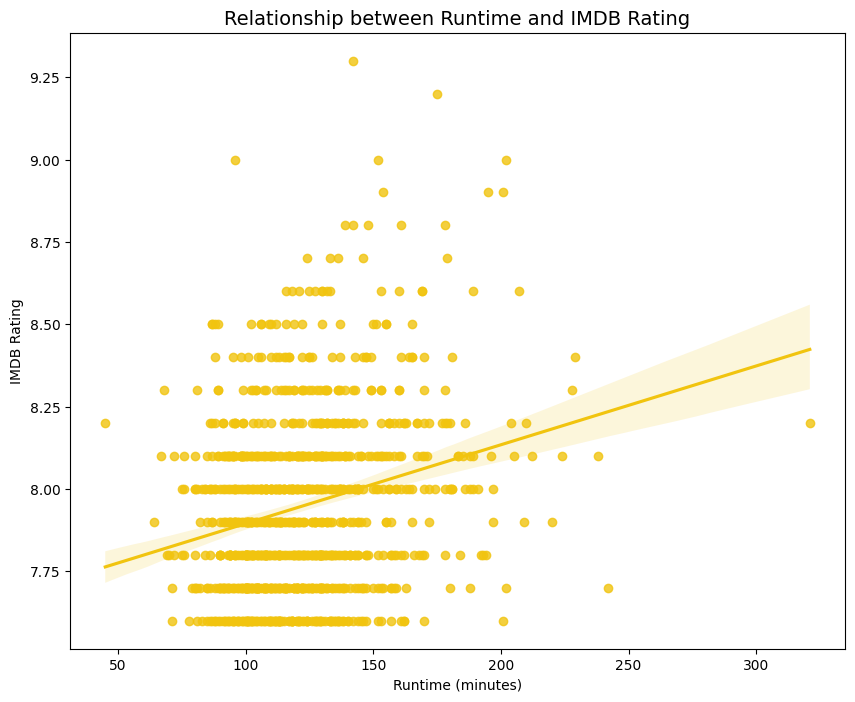

In [49]:
plt.figure(figsize=(10,8))
sns.regplot(x='Runtime', y='IMDB_Rating', data=df, color='#F1C40F')
plt.title('Relationship between Runtime and IMDB Rating', fontsize=14)
plt.xlabel('Runtime (minutes)')
plt.ylabel('IMDB Rating')
plt.show()

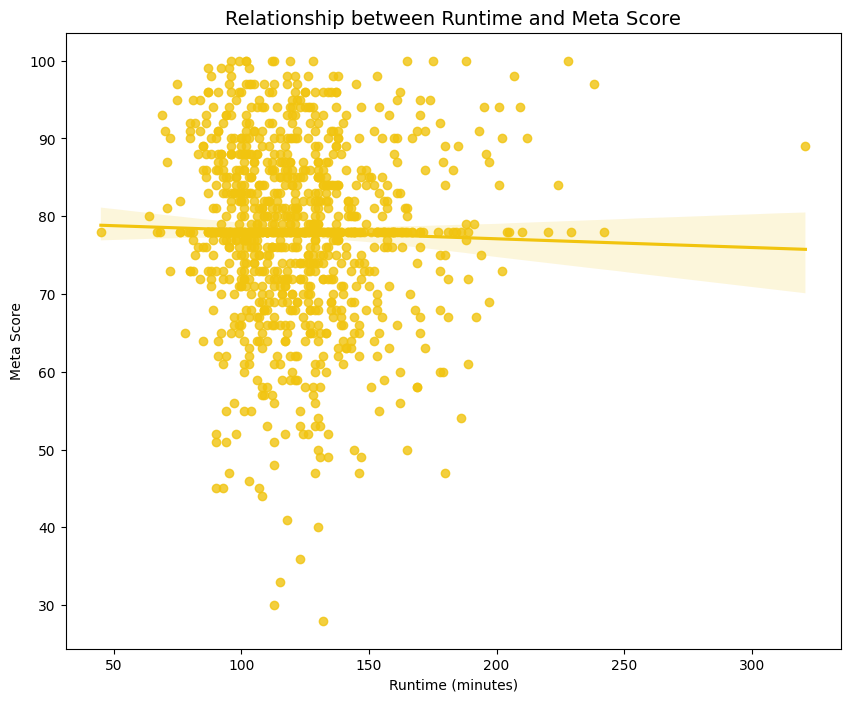

In [50]:
plt.figure(figsize=(10,8))
sns.regplot(x='Runtime', y='Meta_score', data=df, color='#F1C40F')
plt.title('Relationship between Runtime and Meta Score', fontsize=14)
plt.xlabel('Runtime (minutes)')
plt.ylabel('Meta Score')
plt.show()
